En este notebook se hace un análisis inicial de la estructura de los datos. 

In [1]:
import os
import pylab
import mne.io
import os.path
import numpy as np
import matplotlib.pyplot as plt
from TFG_utils import Load_Eeg_Info
from TFG_utils import Get_Frequency
from TFG_utils import take_vmrk_file
from TFG_utils import Get_Start_End
from TFG_utils import spot_samples

In [2]:
mne.__version__

'0.19.2'

El formato de BrainVision tiene una estructura divivida en los tres siguientes ficheros:

* La **cabecera (.vhdr)** del fichero  con los metadatos.

* Un archivo de **marcadores (.vmrk)** del texto con información sobre los eventos.

* Un archivo de **datos binarios (.eeg)** que contiene el valor de los voltajes del EEG.

Los datos de BrainVision pueden leerse con la función mne.io.read_raw_brainvision() con el fichero de cabecera (.vhdr) como input. En esta función, si no se especifica el parámetro scale, los datos aparecen en microvoltios.

In [3]:
example_dir='eeg_example'
filename = os.path.join(example_dir, 'Neuromarketing3850.vhdr')
eeg_object = mne.io.read_raw_brainvision(filename) # Leer los datos
eeg_data = eeg_object.get_data() # Cargar los datos

Extracting parameters from eeg_example\Neuromarketing3850.vhdr...
Setting channel info structure...


Para el estudio de los datos se usarán algunos atributos como:
* **ch_names**: indica el nombre de los canales
* **n_times**: indica el número de muestras de tiempo
* **times**: indica las muestras de tiempo
* **info**: muestra información de todo lo que contiene el objeto

EEG_OBJETC

In [4]:
eeg_object

<RawBrainVision  |  Neuromarketing3850.eeg, n_channels x n_times : 31 x 240140 (480.3 sec), ~63 kB, data not loaded>

In [5]:
print('Hay', len(eeg_object.ch_names),'canales:', eeg_object.ch_names) # Número y nombre de los canales

Hay 31 canales: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [6]:
info=eeg_object.info
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 31 items (EEG: 31)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 140.0 Hz
    meas_date : tuple | 2019-02-21 13:43:42 GMT
    nchan : int | 31
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType

El número de **muestras de tiempo** indica el número de valores del registro eléctrico de EEG tendremos:

In [7]:
print(eeg_object.times) # Muestras de tiempo

[0.00000e+00 2.00000e-03 4.00000e-03 ... 4.80274e+02 4.80276e+02
 4.80278e+02]


In [8]:
print(eeg_object.n_times) # Número de muestras de tiempo

240140


EEG_DATA

In [9]:
print(eeg_data) # Valores de cada muestra de tiempo para los 31 canales

[[ 0.0112562   0.01138095  0.01146259 ... -0.0056125  -0.00452065
  -0.00345244]
 [-0.20467211 -0.20452885 -0.20438803 ... -0.16212165 -0.1620069
  -0.16186281]
 [-0.38860893 -0.38808203 -0.38787422 ... -0.05965178 -0.05909641
  -0.05837648]
 ...
 [ 0.0710443   0.07114235  0.07131583 ...  0.09422232  0.09451621
   0.09487764]
 [-0.11247817 -0.11238896 -0.11233695 ... -0.15871242 -0.15764303
  -0.15662648]
 [-0.0543197  -0.05420066 -0.05413757 ... -0.115281   -0.11416767
  -0.11312777]]


In [10]:
print(eeg_data.shape) # Forma de los datos

(31, 240140)


Hay 31 canales y 240.140 muestras de cada uno de ellos.

Para coger información de los canales que nos interesen:

In [11]:
print(mne.pick_channels(info['ch_names'], include=['Fp1', 'Fz']))
print(mne.pick_channels(info['ch_names'], include=[],exclude=['Fp1', 'Fz']))

[0 1]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]


START

In [12]:
Eeg_Data = Load_Eeg_Info(info)
sfreq = Get_Frequency(Eeg_Data)
vmrk_file = take_vmrk_file('eeg_example')
start_end = Get_Start_End('eeg_example\\' + vmrk_file)

In [13]:
spots_times_sec = [0, 60, 120, 180, 226, 287, 347] # Time at which begins each spot (in sec)
spot_samples = spot_samples(start_end,sfreq, spots_times_sec)
print(spot_samples)

before
[31501, 61501, 91501, 121501, 144501, 175001, 205001]


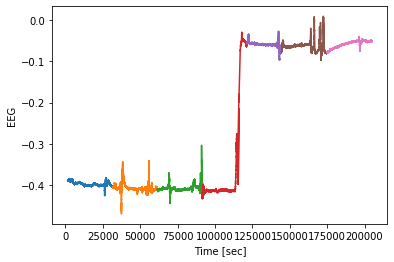

In [14]:
ch=2 #channel to represent
ini= int(60)*int(sfreq) # samples of 1st min of basal activity
i = 0
x=np.arange(spot_samples[i]-ini,spot_samples[i])
plt.plot(x,eeg_data[ch,spot_samples[i]-ini:spot_samples[i]])
plt.xlabel('Time [sec]')
plt.ylabel('EEG')
while i < (len(spot_samples)-1):
    x=np.arange(spot_samples[i],spot_samples[i+1])
    plt.plot(x,eeg_data[ch,spot_samples[i]:spot_samples[i+1]])
    i = i + 1

#### ENLACES
https://mne.tools/dev/auto_tutorials/io/plot_20_reading_eeg_data.html#brainvision-vhdr-vmrk-eeg

https://mne.tools/dev/generated/mne.io.read_raw_brainvision.html#mne-io-read-raw-brainvision

https://mne.tools/dev/generated/mne.io.Raw.html#mne.io.Raw

https://mne.tools/dev/auto_tutorials/intro/plot_30_info.html#sphx-glr-auto-tutorials-intro-plot-30-info-py